<a href="https://colab.research.google.com/github/mertege/FMCW-Data-Classification-/blob/main/FMCW_LSTM_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bu versiyonda LSTM yerine GRU modeli kullanıldı.

In [ ]:
import numpy
from keras.preprocessing import sequence
import scipy.io
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten,Input, Lambda, Activation, Concatenate, LSTM, Embedding, Bidirectional, GRU
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data = scipy.io.loadmat('/content/drive/MyDrive/training_data.mat')
training_label = scipy.io.loadmat('/content/drive/MyDrive/training_label.mat')
testing_data = scipy.io.loadmat('/content/drive/MyDrive/testing_data.mat')
testing_label = scipy.io.loadmat('/content/drive/MyDrive/testing_label.mat')
validation_data = scipy.io.loadmat('/content/drive/MyDrive/validation_data.mat')
validation_label = scipy.io.loadmat('/content/drive/MyDrive/validation_label.mat')
training_and_val_data = scipy.io.loadmat('/content/drive/MyDrive/training_and_val_data.mat')
training_and_val_label = scipy.io.loadmat('/content/drive/MyDrive/training_and_val_label.mat') 
trainingdata_reshaped = scipy.io.loadmat('/content/drive/MyDrive/trainingdata_reshaped.mat')
traininglabel_reshaped = scipy.io.loadmat('/content/drive/MyDrive/traininglabel_reshaped.mat') 
sorted(training_label.keys())

['__globals__', '__header__', '__version__', 'training_label']

In [ ]:
# Convert mat. data to ndarray
training_dataset = training_data['training_data']
training_labelset = training_label['training_label']
testing_dataset = testing_data['testing_data']
testing_label = testing_label['testing_label']
validation_dataset = validation_data['validation_data']
validation_label = validation_label['validation_label']
trainingdata_reshaped = trainingdata_reshaped['trainingdata_reshaped']
traininglabel_reshaped = traininglabel_reshaped['traininglabel_reshaped']
print(validation_label.shape)

(20, 1)


In [ ]:
X_train1 = training_dataset[:,1,:]
X_train2 = training_dataset[:,2,:]
X_train3 = training_dataset[:,3,:]
X_train4 = training_dataset[:,4,:]
X_train5 = training_dataset[:,5,:]
X_train6 = training_dataset[:,6,:]
X_train7 = training_dataset[:,7,:]
X_train8 = training_dataset[:,8,:]
X_train9 = training_dataset[:,9,:]
X_train10 = training_dataset[:,10,:]
X_train11 = training_dataset[:,11,:]
X_train12 = training_dataset[:,12,:]
X_train13 = training_dataset[:,13,:]
X_train14 = training_dataset[:,14,:]
X_train15 = training_dataset[:,0,:]

y_train = training_labelset[:,0]


X_val1 = validation_dataset[:,1,:]
X_val2 = validation_dataset[:,2,:]
X_val3 = validation_dataset[:,3,:]
X_val4 = validation_dataset[:,4,:]
X_val5 = validation_dataset[:,5,:]
X_val6 = validation_dataset[:,6,:]
X_val7 = validation_dataset[:,7,:]
X_val8 = validation_dataset[:,8,:]
X_val9 = validation_dataset[:,9,:]
X_val10 = validation_dataset[:,10,:]
X_val11 = validation_dataset[:,11,:]
X_val12 = validation_dataset[:,12,:]
X_val13 = validation_dataset[:,13,:]
X_val14 = validation_dataset[:,14,:]
X_val15 = validation_dataset[:,0,:]

y_val = validation_label[:,0]

X_test1 = testing_dataset[:,1,:]
X_test2 = testing_dataset[:,2,:]
X_test3 = testing_dataset[:,3,:]
X_test4 = testing_dataset[:,4,:]
X_test5 = testing_dataset[:,5,:]
X_test6 = testing_dataset[:,6,:]
X_test7 = testing_dataset[:,7,:]
X_test8 = testing_dataset[:,8,:]
X_test9 = testing_dataset[:,9,:]
X_test10 = testing_dataset[:,10,:]
X_test11 = testing_dataset[:,11,:]
X_test12 = testing_dataset[:,12,:]
X_test13 = testing_dataset[:,13,:]
X_test14 = testing_dataset[:,14,:]
X_test15 = testing_dataset[:,0,:]

y_test = testing_label[:,0]

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           [(None, 4225)]       0                                            
__________________________________________________________________________________________________
input_48 (InputLayer)           [(None, 4225)]       0                                            
__________________________________________________________________________________________________
input_49 (InputLayer)           [(None, 4225)]       0                                            
__________________________________________________________________________________________________
input_50 (InputLayer)           [(None, 4225)]       0                                            
___________________________________________________________________________________________

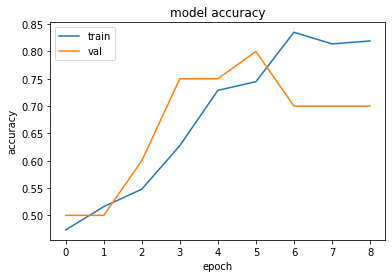

In [ ]:
# FMCW Learning with Function API GRU

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


LSTM_hidden_units = 8
dense_input_unit = LSTM_hidden_units*15
top_words = 4225
max_review_length = 4225
embedding_vecor_length = 16
def summation(vects):
    x, y = vects
    return x+y
def summation_shape(shapes):
    shape1, shape2 = shapes
    return (shape1)


def create_base_network1(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network2(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network3(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network4(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network5(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network6(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network7(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network8(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network9(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network10(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network11(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network12(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)
def create_base_network13(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network14(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def create_base_network15(input_shape):
 
    input = Input(shape=input_shape)
    x = Embedding(top_words, embedding_vecor_length, input_length=max_review_length)(input)
    x = (Dropout(0.2))(x)
    x = GRU(LSTM_hidden_units)(x)
    x = (Dropout(0.2))(x)
    return Model(input, x)

def decoder(input_shape):
    input = Input(shape=input_shape)    
    x = (Dropout(0.2))(input)
    x = Dense(16, activation="sigmoid")(x)
    out = Dense(1, activation="sigmoid")(x)
    return Model(input, out)

input_shape = ((4225))
base_network1 = create_base_network1(input_shape)
base_network2 = create_base_network2(input_shape)
base_network3 = create_base_network3(input_shape)
base_network4 = create_base_network4(input_shape)
base_network5 = create_base_network5(input_shape)
base_network6 = create_base_network6(input_shape)
base_network7 = create_base_network7(input_shape)
base_network8 = create_base_network8(input_shape)
base_network9 = create_base_network9(input_shape)
base_network10 = create_base_network10(input_shape)
base_network11 = create_base_network11(input_shape)
base_network12 = create_base_network12(input_shape)
base_network13 = create_base_network13(input_shape)
base_network14 = create_base_network14(input_shape)
base_network15 = create_base_network15(input_shape)

input_1  = Input(shape=input_shape)
input_2  = Input(shape=input_shape)
input_3  = Input(shape=input_shape)
input_4  = Input(shape=input_shape)
input_5  = Input(shape=input_shape)
input_6  = Input(shape=input_shape)
input_7  = Input(shape=input_shape)
input_8  = Input(shape=input_shape)
input_9  = Input(shape=input_shape)
input_10 = Input(shape=input_shape)
input_11 = Input(shape=input_shape)
input_12 = Input(shape=input_shape)
input_13 = Input(shape=input_shape)
input_14 = Input(shape=input_shape)
input_15 = Input(shape=input_shape)

processed_1  = base_network1(input_1 )
processed_2  = base_network2(input_2 )
processed_3  = base_network1(input_3 )
processed_4  = base_network2(input_4 )
processed_5  = base_network1(input_5 )
processed_6  = base_network2(input_6 )
processed_7  = base_network1(input_7 )
processed_8  = base_network2(input_8 )
processed_9  = base_network1(input_9 )
processed_10 = base_network2(input_10)
processed_11 = base_network1(input_11)
processed_12 = base_network2(input_12)
processed_13 = base_network1(input_13)
processed_14 = base_network2(input_14)
processed_15 = base_network1(input_15)


# sum_shape = X_train1.shape
# aa = Lambda(summation,
#                   output_shape=sum_shape)([processed_a, processed_b])
aa = Concatenate()([processed_1, processed_2,processed_3, processed_4,processed_5, processed_6,processed_7, processed_8,processed_9, processed_10,processed_11, processed_12,processed_13, processed_14,processed_15])

base_decoder_network = decoder((dense_input_unit))
out1 = base_decoder_network(aa)
# out2 = base_decoder_network(aa)


model = Model(inputs=[input_1, input_2,input_3, input_4,input_5, input_6,input_7, input_8,input_9, input_10,input_11, input_12,input_13, input_14,input_15], outputs=[out1])       


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()
earlyStopping = EarlyStopping(monitor='val_loss', patience=6, verbose=0,restore_best_weights=True, mode='min')

filepath_checkpoint = "mymodel"
model_checkpoint_callback =  keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath= filepath_checkpoint,
        save_weights_only=True,
        mode="min",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )

history = model.fit((X_train1 ,X_train2 ,X_train3 ,X_train4 ,X_train5 ,X_train6 ,X_train7 ,X_train8 ,X_train9 ,X_train10,X_train11,X_train12,X_train13,X_train14,X_train15), (y_train),
                epochs=30,
                batch_size=16,
                callbacks=[earlyStopping, model_checkpoint_callback],
                validation_data=((X_val1 ,X_val2,X_val3 ,X_val4,X_val5 ,X_val6,X_val7 ,X_val8,X_val9 ,X_val10,X_val11 ,X_val12,X_val13 ,X_val14,X_val15), (y_val)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights(filepath_checkpoint)
loss, accuracy, f1_score, precision, recall = model.evaluate((X_test1,X_test2,X_test3,X_test4,X_test5,X_test6,X_test7,X_test8,X_test9,X_test10,X_test11,X_test12,X_test13,X_test14,X_test15) ,y_test, batch_size=8)
print("test loss:", loss)
print("test acc:", accuracy)
print("f1_score:", f1_score)

3/3 [==============================] - 7s 2s/step - loss: 0.6827 - accuracy: 0.7500 - f1_m: 0.4524 - precision_m: 0.5000 - recall_m: 0.4167
test loss: 0.6826640367507935
test acc: 0.75
f1_score: 0.452380895614624
